<p style="font-size: 30px;font-weight: bold"> Customer Segmentation for E-commerce Personalization.</p>


# Steps:

## Import required libraries:

In [58]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

## 1- Import Dataset: 
<a style="font-size: 13px;font-weight:bold;" href="https://archive.ics.uci.edu/ml/datasets/online+retail" >Online Retail Dataset from the UCI Machine Learning Repository Dataset</a>

In [2]:
data = pd.read_csv('OnlineRetail.csv',encoding = 'unicode_escape')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


##  2- Data Preparation: 
<p style="font-size: 13px;font-weight:bold;">Perform Exploratory Data analysis, Data Pre-processing and Preparation, Handle missing values, clean the data, and transform it into a suitable format for analysis.</p>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
data.dropna(inplace = True)
data.isna().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


## 3-Feature Engineering: 
<p style="font-size: 13px;font-weight:bold;">Extract relevant features from the dataset that capture customer behavior, such as purchase history, order frequency, total spending, etc. Calculate additional metrics if necessary, such as recency of purchase or average basket size.</p>


<p style="font-size: 12px;font-weight:bold;">Create total_amount coloumn that we will use in RFM analysis.</p>

In [5]:
data['Total_Amount'] = data['Quantity']*data['UnitPrice']

#### Perform RFM
Recency, frequency, monetary value (RFM) is a model used in marketing analysis that segments a company’s consumer base by their purchasing patterns or habits. In particular, it evaluates customers’ recency (how long ago they made a purchase), frequency (how often they make purchases), and monetary value (how much money they spend).

#### Let’s calculate RFM values.

Calcualte the <b>M-monetary</b> value. We will be using the Total_Amount column that we have created before.

In [6]:
m = data.groupby('CustomerID')['Total_Amount'].sum()
m = pd.DataFrame(m).reset_index()
m.head()

,CustomerID,Total_Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


Calculate the number of times each customer purchased from the store <b>F-freuency</b>.We will be using the CustomerID and InvoiceDate columns.

In [7]:
f = data.groupby('CustomerID')['InvoiceNo'].count()
f =f.reset_index()
f.columns = ['CustomerID','Frequency']
f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


Finally, Let’s calculate <b>R-receny</b> value for each customer.
First, we need to find the when was the last purchase done in the data set.
Initially, we are changing the format and datatype of the given InvoiceDate to the format specified and then calculating the last date of purchase.

In [8]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format = '%d-%m-%Y %H:%M')
last_day = max(data['InvoiceDate'])
last_day

Timestamp('2011-12-09 12:50:00')

<b>To find out the last date of purchase of each customer</b>



In [9]:
data['difference'] = last_day - data['InvoiceDate']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount,difference
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


<b>Now we need just the number of days but not the time and days attached to it just the integer. So that, it is easier to groupby later on based on each customer.So we can have a seperate function to give the integer number.</b>

In [10]:
def get_days(x):
    y = str(x).split()[0]
    return int(y)
data['difference'] = data['difference'].apply(get_days)

<b>Now, we can groupby each customer by using CustomerId and difference column.</b>

In [11]:
r = data.groupby('CustomerID')['difference'].min()
r = r.reset_index()
r.columns = ['CustomerID','Recency']
r.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


<b>Now we have created all three seperate dataframes for Recency (r), frequency (f), monetary (m). Let’s group these dataframes.and perform inner join to group up 3 dataframes.</b>

In [12]:
grouped_df = pd.merge(m, f, on = 'CustomerID',how = 'inner')
RFM_df = pd.merge(grouped_df, r, on ='CustomerID', how = 'inner')
RFM_df.columns = ['CustomerID','Monetary','Frequency','Recency']

In [13]:
RFM_df

,CustomerID,Monetary,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7
4370,18283.0,2094.88,756,3


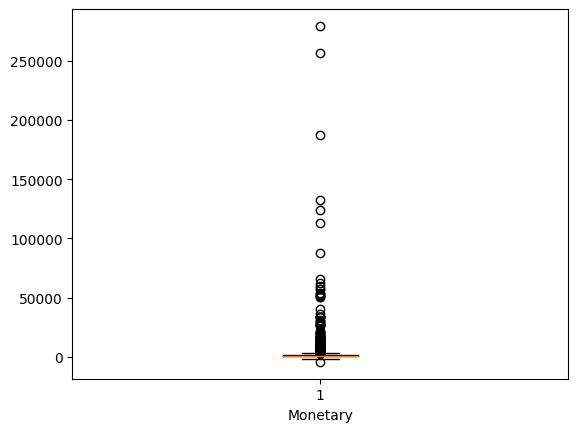

In [14]:
plt.boxplot(RFM_df['Monetary'])
plt.xlabel('Monetary')
plt.show()

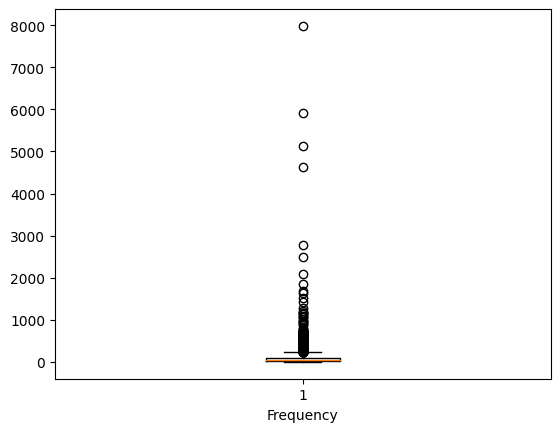

In [15]:
plt.boxplot(RFM_df['Frequency'])
plt.xlabel('Frequency')
plt.show()

In [16]:
outlier_vars = ['Monetary','Recency','Frequency']
for column in outlier_vars:
    
    lower_quartile = RFM_df[column].quantile(0.25)
    upper_quartile = RFM_df[column].quantile(0.75)
    iqr = upper_quartile - lower_quartile
    iqr_extended = iqr * 1.5
    min_border = lower_quartile - iqr_extended
    max_border = upper_quartile + iqr_extended
    
    outliers = RFM_df[(RFM_df[column] < min_border) |     (RFM_df[column] > max_border)].index
    print(f"{len(outliers)} outliers detected in column {column}")
    
    RFM_df.drop(outliers, inplace = True)

423 outliers detected in column Monetary
81 outliers detected in column Recency
239 outliers detected in column Frequency


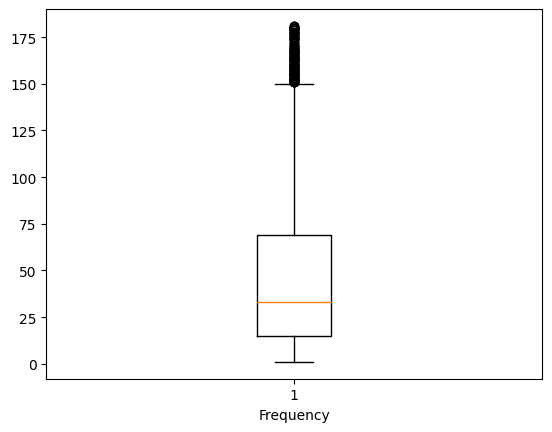

In [17]:
plt.boxplot(RFM_df['Frequency'])
plt.xlabel('Frequency')
plt.show()

<b>A good way to get an initial understanding of the relationship between the different variables is to explore how they correlate.We calculate the correlation between our variables using corr method in the pandas library.</b>

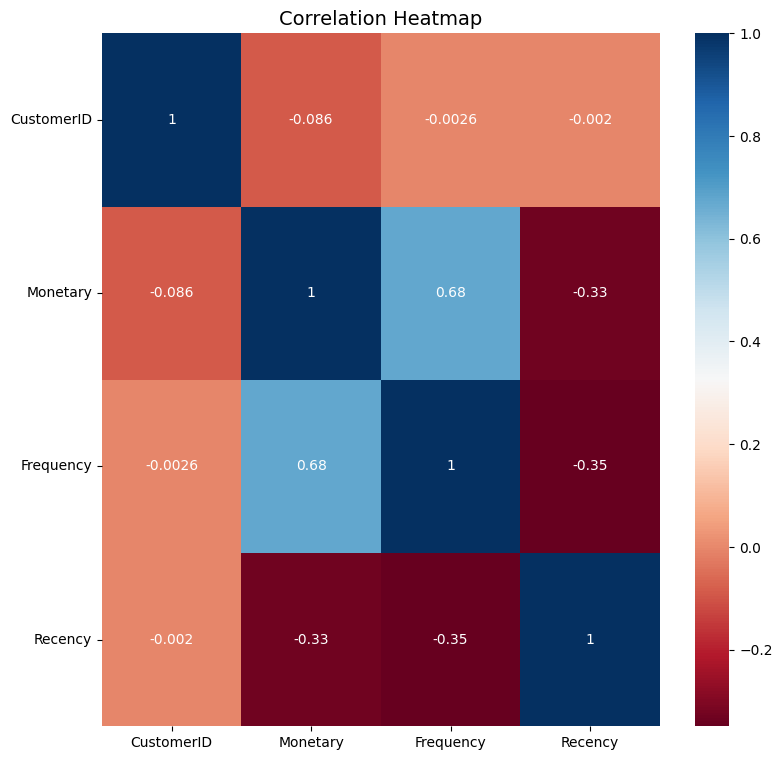

In [18]:
plt.figure(figsize=(9,9))
sns.heatmap(RFM_df.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

<b>We see that there is a strong correlation between Monetary and Frequency. </b>

## Standardisation

<p style="font-size: 13px;font-weight:bold;">Now we need to standardise the data, as there are larger vlaues that can dominate from defining clusters.
As clustering algorithm is based on distance between the data points, we need to scale the data to follow a normal distribution of mean 0 and standard deviation of 1.<p>

In [19]:
scaled_df = RFM_df[['Monetary','Frequency','Recency']]
scale_standardisation = StandardScaler()
rfm_df_scaled = scale_standardisation.fit_transform(scaled_df)
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Monetary','Frequency','Recency']
rfm_df_scaled

,Monetary,Frequency,Recency
0,-1.056277,-1.076164,2.351537
1,1.355840,-0.393805,-0.239067
2,1.302571,0.594439,-0.817050
3,-0.607471,-0.723220,2.186399
4,1.017853,1.112091,-0.641591
...,...,...,...
3624,-0.822881,-0.911457,-0.249388
3625,-0.813889,-0.887927,1.856122
3626,-0.947806,-0.958516,0.854973
3627,-0.819258,-0.817338,-0.930582


## 4- Dimensionality Reduction with PCA: 
<p style="font-size: 13px;font-weight:bold;">Apply PCA to reduce the dimensionality of the feature space while retaining the most informative features. This step aims to capture the underlying patterns and structure in the data. </p > 

In [20]:
pca = PCA()
pca.fit(rfm_df_scaled)
rfm_df_scaled

,Monetary,Frequency,Recency
0,-1.056277,-1.076164,2.351537
1,1.355840,-0.393805,-0.239067
2,1.302571,0.594439,-0.817050
3,-0.607471,-0.723220,2.186399
4,1.017853,1.112091,-0.641591
...,...,...,...
3624,-0.822881,-0.911457,-0.249388
3625,-0.813889,-0.887927,1.856122
3626,-0.947806,-0.958516,0.854973
3627,-0.819258,-0.817338,-0.930582


<b>Now, Let’s see the explained variance ratio by each component.</b>

In [21]:
pca.explained_variance_ratio_

array([0.6423063 , 0.25050261, 0.10719109])

<b>We observe that the first component explains around 64 % of the variability of the data. The second one is 26 % and the third is 10 %.</b>

<b>We now can plot the cumulative sum of explained variance.</b>

Text(0, 0.5, 'Cumulative Explained Variance')

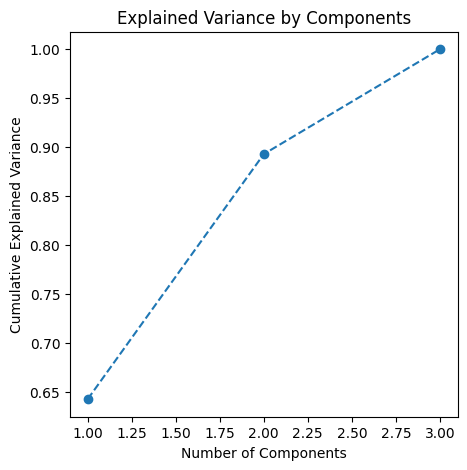

In [22]:
plt.figure(figsize = (5,5))
plt.plot(range(1,4), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

<b>
Well, How do we choose the right number of components? The answer is there is no right or wrong answer for that.But, a rule of thumb is to keep at least 70 to 80 percent of the explained variance.80 % of the variance of the data is explained by the first 2 components. Let’s keep the first 2 components for our further analysis.
</b>

In [23]:
pca = PCA(n_components =2)
pca.fit(rfm_df_scaled)
pca.components_

array([[ 0.62510797,  0.63053757, -0.46006783],
       [ 0.34482788,  0.30569533,  0.88749315]])

<b>
The result is a 2 by 3 array. We reduced our futures to two components from the original three values that explain the shape; the values themselves show the so-called loadings.

what is loading then?

Loadings are correlations between an original variable and the component.

For instance, the first value of the array shows the loading of the first feature on the first component.

Let’s put this information in a pandas data frame so that we can see them nicely. Columns are three original features and rows are two components that PCA gave us.
</b>

In [24]:
df_pca_comp = pd.DataFrame(data = pca.components_,columns = rfm_df_scaled.columns,index = ['Component 1', 'Component 2'])
df_pca_comp

,Monetary,Frequency,Recency
Component 1,0.625108,0.630538,-0.460068
Component 2,0.344828,0.305695,0.887493


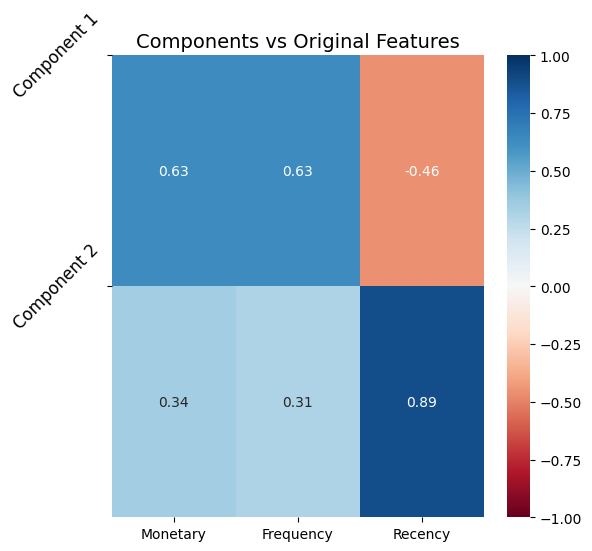

In [25]:
plt.figure(figsize=(6,6))
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1], 
           ['Component 1', 'Component 2' ],
           rotation = 45,
           fontsize = 12)
plt.title('Components vs Original Features',fontsize = 14)
plt.show()

<b>
We see that there is a positive correlation between Component1 and Monetary,Frequency. These are strictly related to the total spending and how many time a customer do shoping.
For the second component Recenct is by far the most prominent determinants.

Now, we have an idea about our new variables(components). We can clearly see the relationship between components and variables.

</b>

<b>Let’s transform our data and save it scores_pca.</b>

In [26]:
# pca.transform(rfm_df_scaled)
scores_pca = pca.transform(rfm_df_scaled)
pd.DataFrame(scores_pca)

,0,1
0,-2.420715,1.393761
1,0.709224,0.134977
2,1.564962,-0.094246
3,-1.841644,1.509856
4,1.632658,0.121538
...,...,...
3624,-0.974362,-0.783711
3625,-1.922582,1.095209
3626,-1.590207,0.138939
3627,-0.599356,-1.358245


## 5- Determining Optimal Number of Clusters: 
<p style="font-size: 13px;font-weight:bold;">Use the elbow method or silhouette analysis to determine the optimal number of clusters for K-means. Experiment with different values of K and evaluate the clustering results.</p> 


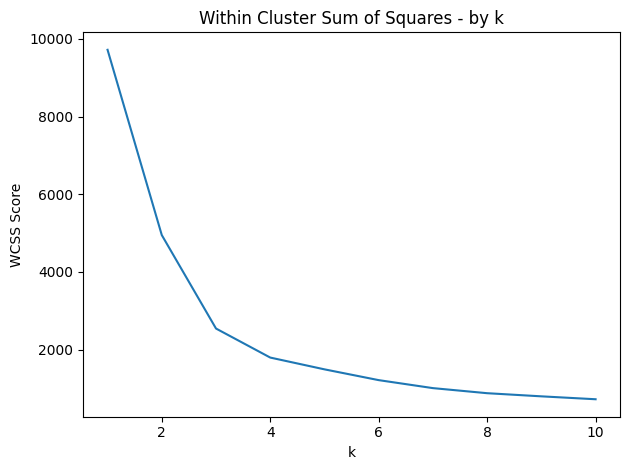

In [27]:
k_values = list(range(1,11))
wcss_list = []
for k in k_values:
    kmeans = KMeans(n_clusters = k,n_init=10)
    kmeans.fit_transform(scores_pca)
    wcss_list.append(kmeans.inertia_)
plt.plot(k_values,wcss_list)
plt.xlabel("k")
plt.ylabel("WCSS Score")
plt.title("Within Cluster Sum of Squares - by k")
plt.tight_layout()
plt.show()

<b>
From the above graph, we can clearly see that when x-axis is on 3, graph clearly has an elbow. So, we will choose the number of clusters or customer groups to be 3.
</b>

## 6- K-means Clustering: 
<p style="font-size: 13px;font-weight:bold;">Perform K-means clustering on the reduced feature space. Assign each customer to a cluster based on their feature values. Analyze the resulting clusters and interpret the characteristics of each segment.</p>


In [28]:
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++',n_init=10, random_state = 42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=3, n_init=10, random_state=42)

<b>K-Means algorithm has learnt from our new components and created 3 clusters . I would like to see old datasets with new components and labels.</b>

In [29]:
df_segm_pca_kmeans = pd.concat([RFM_df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-2: ] = ['Component 1', 'Component 2']

df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans.head()

,CustomerID,Monetary,Frequency,Recency,Component 1,Component 2,Segment K-means PCA
0,12346.0,0.00,2,325,-2.420715,1.393761,1
1,12348.0,1797.24,31,74,0.709224,0.134977,0
2,12349.0,1757.55,73,18,1.564962,-0.094246,2
3,12350.0,334.40,17,309,-1.841644,1.509856,1
4,12352.0,1545.41,95,35,1.632658,0.121538,2


## 7- Cluster Profiling: 
<p style="font-size: 13px;font-weight:bold;">Profile each cluster by calculating cluster-specific metrics, such as average spending, purchase frequency, or popular product categories. Identify the key characteristics and behaviors that distinguish each cluster. Let’s look at the analytics of RFM dataframe.
</p>

In [30]:
RFM_df['Clusters'] = kmeans_pca.labels_
analysis = RFM_df.groupby('Clusters').agg({
    'Recency':['mean','max','min'],
    'Frequency':['mean','max','min'],
    'Monetary':['mean','max','min','count']})
analysis 

Recency             Frequency              Monetary           \
                mean  max  min        mean  max min         mean      max   
Clusters                                                                    
0          49.446997  171    0   34.538903  121   1   561.482237  2207.40   
1         241.015054  362  133   21.550538  152   1   343.590419  2661.24   
2          43.072704  337    0  111.035714  181   1  1863.923407  3563.85   

                         
              min count  
Clusters                 
0        -1165.30  1915  
1        -1592.49   930  
2          360.93   784

<b>From the above analytics, we can interpret the following.</b>

<b>
    
|  Cluster   | Customer Type  | RFN Analysis                                                          |  Recommendations |
| ---        | ---            | ---                                                                   | ---              |
| 0         | Risk of leaving| Average spending and moderately visit the srore.the last transaction was done some time back.                    |A survey can be done to find out the reason and create customised marketing plans to encourage them to purchse again.              |    
| 1          | New Cusomers   | Recently visited the store with minimum frequendy and spending.       |Should focus on customer engagement and enhance shopping experience for these customers.              |
| 2          | Loyal Customers| Frequent and heavy spending customers.                                |Might be the target cusomer for new products. As it is a wholesale store, these potential customers to buy bulck orders.              |    
  
   
</b>   
 

<b>Thus, we can recommend the customers in cluster ‘0’ to the online store.</b>



## 8- Visualization: 
<p style="font-size: 13px;font-weight:bold;">Visualize the clusters and their separation using scatter plots or other suitable techniques. Plot the clusters based on the reduced feature space to understand the distribution and overlap of customers.</p> 

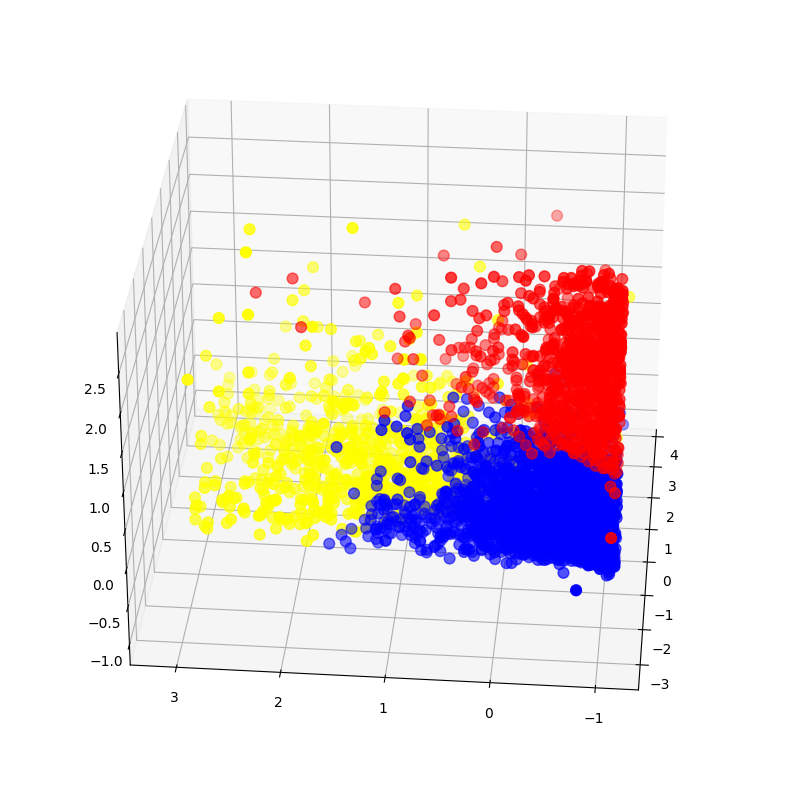

In [31]:
clusters = kmeans_pca.labels_
RFM = rfm_df_scaled 
RFM['labels'] = clusters
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(RFM["Monetary"][RFM.labels == 0], RFM["Frequency"][RFM.labels == 0], RFM["Recency"][RFM.labels == 0], c='blue', s=60)
ax.scatter(RFM["Monetary"][RFM.labels == 1],RFM["Frequency"][RFM.labels == 1], RFM["Recency"][RFM.labels == 1], c='red', s=60)
ax.scatter(RFM["Monetary"][RFM.labels == 2], RFM["Frequency"][RFM.labels == 2], RFM["Recency"][RFM.labels == 2], c='yellow', s=60)
ax.view_init(30, 185)
plt.show()

## 9- Evaluation: 
<p style="font-size: 13px;font-weight:bold;">Evaluate the quality of the clustering results using appropriate metrics such as silhouette score or within-cluster sum of squares (WCSS). Assess the cohesion and separation of the clusters to determine the effectiveness of the segmentation.</p> 

In [66]:
# Applying KMeans Clustering with 2 clusters:

KMean= KMeans(n_clusters=2, n_init=10 )
KMean.fit(rfm_df_scaled)
label=KMean.predict(rfm_df_scaled)
# Calculating the silhouette score:

print(f'Silhouette Score(n=2): {silhouette_score(rfm_df_scaled, label)}')

Silhouette Score(n=2): 0.5219436848379574


<b>We can say that the clusters are not well apart from each other as the silhouette score is <strong style="color:red;">0.5219436848379574</strong> and that not  closer to 1.</b>

## 10- Personalization and Recommendations: 
<p style="font-size: 13px;font-weight:bold;">Based on the identified customer segments, develop personalized marketing strategies and recommendations. Tailor promotions, product suggestions, or communication channels for each cluster to enhance customer engagement and satisfaction. Interpretation and Insights: Interpret the results and provide insights about the different customer segments. Discuss the implications for the e-commerce business, such as targeted marketing, customer retention, or inventory management. Remember to adhere to ethical guidelines and data privacy regulations while working with customer data.</p>

<b>
    
|  Cluster   | Customer Type  | RFN Analysis                                                          |  Recommendations |
| ---        | ---            | ---                                                                   | ---              |
| 0         | Risk of leaving| Average spending and moderately visit the srore.the last transaction was done some time back.                    |A survey can be done to find out the reason and create customised marketing plans to encourage them to purchse again.              |    
| 1          | New Cusomers   | Recently visited the store with minimum frequendy and spending.       |Should focus on customer engagement and enhance shopping experience for these customers.              |
| 2          | Loyal Customers| Frequent and heavy spending customers.                                |Might be the target cusomer for new products. As it is a wholesale store, these potential customers to buy bulck orders.              |   
    
 </b>   